In [ ]:
try pivot on the stock index

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
  

In [2]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '65d05907-f108-4f0c-8abb-ac90904cf30e',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2022-12-28T22:34:25.523Z', 'error_code': 0, 'error_message': None, 'elapsed': 333, 'credit_count': 1, 'notice': None, 'total_count': 8896}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9914, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [3]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9914,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.924578e+07,1.924578e+07,...,40.0529,3.466686e+11,None,2022-12-28T22:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-28 22:34:45.632167
1,1027,Ethereum,ETH,ethereum,6322,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,...,18.2973,1.451468e+11,None,2022-12-28T22:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-28 22:34:45.632167
2,825,Tether,USDT,tether,45608,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.624765e+10,7.314177e+10,...,8.3484,7.311665e+10,None,2022-12-28T22:33:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-12-28 22:34:45.632167
3,3408,USD Coin,USDC,usd-coin,9301,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.438395e+10,4.438395e+10,...,5.5952,4.438509e+10,None,2022-12-28T22:33:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-12-28 22:34:45.632167
4,1839,BNB,BNB,bnb,1162,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.599652e+08,1.599800e+08,...,4.8996,4.859446e+10,None,2022-12-28T22:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-28 22:34:45.632167
5,52,XRP,XRP,xrp,870,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.034350e+10,9.998918e+10,...,2.2706,3.577865e+10,None,2022-12-28T22:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-28 22:34:45.632167
6,4687,Binance USD,BUSD,binance-usd,5912,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.702516e+10,1.702516e+10,...,2.1462,1.702518e+10,None,2022-12-28T22:33:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-12-28 22:34:45.632167
7,74,Dogecoin,DOGE,dogecoin,628,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,...,1.1722,9.298368e+09,None,2022-12-28T22:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-28 22:34:45.632167
8,2010,Cardano,ADA,cardano,623,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.450954e+10,3.528563e+10,...,1.0793,1.116483e+10,None,2022-12-28T22:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-28 22:34:45.632167
9,3890,Polygon,MATIC,polygon,563,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, scaling, stat...",1.000000e+10,8.734317e+09,1.000000e+10,...,0.8587,7.799159e+09,None,2022-12-28T22:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-28 22:34:45.632167


In [4]:
#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.set_option('display.max_rows', None)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9914,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.924578e+07,1.924578e+07,NaN,1,NaN,NaN,None,2022-12-28T22:33:00.000Z,16508.028775,1.679172e+10,4.6666,-0.217705,-1.193873,-1.616929,1.765005,-20.549985,-15.186590,3.177098e+11,40.0529,3.466686e+11,None,2022-12-28T22:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-28 22:34:45.632167
1,1027,Ethereum,ETH,ethereum,6322,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2022-12-28T22:33:00.000Z,1186.093096,4.911269e+09,15.9110,-0.330514,-2.190215,-2.057994,1.184919,-26.744004,-10.982751,1.451468e+11,18.2973,1.451468e+11,None,2022-12-28T22:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-28 22:34:45.632167
2,825,Tether,USDT,tether,45608,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.624765e+10,7.314177e+10,NaN,3,NaN,NaN,None,2022-12-28T22:33:00.000Z,0.999657,2.092553e+10,10.9701,-0.008146,-0.023572,-0.039539,-0.000293,-0.057729,-0.040646,6.622490e+10,8.3484,7.311665e+10,None,2022-12-28T22:33:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-12-28 22:34:45.632167
3,3408,USD Coin,USDC,usd-coin,9301,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.438395e+10,4.438395e+10,NaN,4,NaN,NaN,None,2022-12-28T22:33:00.000Z,1.000026,2.215904e+09,28.3873,-0.000901,-0.008346,0.007610,-0.020051,0.004423,0.009119,4.438509e+10,5.5952,4.438509e+10,None,2022-12-28T22:33:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-12-28 22:34:45.632167
4,1839,BNB,BNB,bnb,1162,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.599652e+08,1.599800e+08,NaN,5,NaN,NaN,None,2022-12-28T22:33:00.000Z,242.972288,4.133042e+08,5.5280,0.019670,-1.180529,-1.486613,-17.137578,-20.013094,-14.038967,3.886712e+10,4.8996,4.859446e+10,None,2022-12-28T22:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-28 22:34:45.632167
5,52,XRP,XRP,xrp,870,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.034350e+10,9.998918e+10,NaN,6,NaN,NaN,None,2022-12-28T22:33:00.000Z,0.357786,8.473808e+08,-8.0816,-0.043095,-3.678261,3.281963,-8.238946,-23.801690,-26.815598,1.801222e+10,2.2706,3.577865e+10,None,2022-12-28T22:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-28 22:34:45.632167
6,4687,Binance USD,BUSD,binance-usd,5912,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.702516e+10,1.702516e+10,NaN,7,NaN,NaN,None,2022-12-28T22:33:00.000Z,1.000001,5.069719e+09,10.3008,-0.026421,-0.021143,-0.007018,-0.020474,0.064078,-0.014840,1.702518e+10,2.1462,1.702518e+10,None,2022-12-28T22:33:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-12-28 22:34:45.632167
7,74,Dogecoin,DOGE,dogecoin,628,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,NaN,8,NaN,NaN,None,2022-12-28T22:33:00.000Z,0.070086,4.906034e+08,64.1869,-0.721164,-4.466833,-4.269559,-26.540038,-45.170243,16.026132,9.298368e+09,1.1722,9.298368e+09,None,2022-12-28T22:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-28 22:34:45.632167
8,2010,Cardano,ADA,cardano,623,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.450954e+10,3.528563e+10,N

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
    }
    headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '65d05907-f108-4f0c-8abb-ac90904cf30e',
    }
    
    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)


    # Use this if you want to create a csv and append data to it
    # df = pd.json_normalize(data['data'])
    # df['timestamp'] = pd.to_datetime('now')
    # df
    
    
    #if not os.path.isfile(r'C:\Users\Yaron\OneDrive\Desktop\CryptoAPI\CryptoAPI.csv'):
        #df.to_csv(r'C:\Users\Yaron\OneDrive\Desktop\CryptoAPI\CryptoAPI.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\Yaron\OneDrive\Desktop\CryptoAPI\CryptoAPI.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\Yaron\OneDrive\Desktop\CryptoAPI\CryptoAPI.csv)

# If that didn't work try using the local host URL as shown in the video

In [6]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

{'status': {'timestamp': '2022-12-28T22:37:39.376Z', 'error_code': 0, 'error_message': None, 'elapsed': 36, 'credit_count': 1, 'notice': None, 'total_count': 8896}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9914, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

KeyboardInterrupt: 

In [7]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9914,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.924578e+07,1.924578e+07,NaN,1,NaN,NaN,None,2022-12-28T22:33:00.000Z,16508.028775,1.679172e+10,4.6666,-0.217705,-1.193873,-1.616929,1.765005,-20.549985,-15.186590,3.177098e+11,40.0529,3.466686e+11,None,2022-12-28T22:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-28 22:34:45.632167
1,1027,Ethereum,ETH,ethereum,6322,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2022-12-28T22:33:00.000Z,1186.093096,4.911269e+09,15.9110,-0.330514,-2.190215,-2.057994,1.184919,-26.744004,-10.982751,1.451468e+11,18.2973,1.451468e+11,None,2022-12-28T22:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-28 22:34:45.632167
2,825,Tether,USDT,tether,45608,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.624765e+10,7.314177e+10,NaN,3,NaN,NaN,None,2022-12-28T22:33:00.000Z,0.999657,2.092553e+10,10.9701,-0.008146,-0.023572,-0.039539,-0.000293,-0.057729,-0.040646,6.622490e+10,8.3484,7.311665e+10,None,2022-12-28T22:33:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-12-28 22:34:45.632167
3,3408,USD Coin,USDC,usd-coin,9301,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.438395e+10,4.438395e+10,NaN,4,NaN,NaN,None,2022-12-28T22:33:00.000Z,1.000026,2.215904e+09,28.3873,-0.000901,-0.008346,0.007610,-0.020051,0.004423,0.009119,4.438509e+10,5.5952,4.438509e+10,None,2022-12-28T22:33:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-12-28 22:34:45.632167
4,1839,BNB,BNB,bnb,1162,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.599652e+08,1.599800e+08,NaN,5,NaN,NaN,None,2022-12-28T22:33:00.000Z,242.972288,4.133042e+08,5.5280,0.019670,-1.180529,-1.486613,-17.137578,-20.013094,-14.038967,3.886712e+10,4.8996,4.859446e+10,None,2022-12-28T22:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-28 22:34:45.632167
5,52,XRP,XRP,xrp,870,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.034350e+10,9.998918e+10,NaN,6,NaN,NaN,None,2022-12-28T22:33:00.000Z,0.357786,8.473808e+08,-8.0816,-0.043095,-3.678261,3.281963,-8.238946,-23.801690,-26.815598,1.801222e+10,2.2706,3.577865e+10,None,2022-12-28T22:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-28 22:34:45.632167
6,4687,Binance USD,BUSD,binance-usd,5912,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.702516e+10,1.702516e+10,NaN,7,NaN,NaN,None,2022-12-28T22:33:00.000Z,1.000001,5.069719e+09,10.3008,-0.026421,-0.021143,-0.007018,-0.020474,0.064078,-0.014840,1.702518e+10,2.1462,1.702518e+10,None,2022-12-28T22:33:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-12-28 22:34:45.632167
7,74,Dogecoin,DOGE,dogecoin,628,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,NaN,8,NaN,NaN,None,2022-12-28T22:33:00.000Z,0.070086,4.906034e+08,64.1869,-0.721164,-4.466833,-4.269559,-26.540038,-45.170243,16.026132,9.298368e+09,1.1722,9.298368e+09,None,2022-12-28T22:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-28 22:34:45.632167
8,2010,Cardano,ADA,cardano,623,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.450954e+10,3.528563e+10,N

In [8]:
df.shape

(105, 36)

In [9]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [10]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.08848,-1.15934,-1.59258,1.77029,-20.53729,-15.11614
Ethereum,-0.18400,-2.14990,-2.00944,1.21513,-26.70703,-10.79746
Tether,-0.00819,-0.02040,-0.03947,-0.00203,-0.05878,-0.03951
USD Coin,0.01143,-0.00734,0.00656,-0.01210,0.01188,0.01818
BNB,0.17143,-1.10928,-1.46276,-17.09374,-19.91656,-13.89766
XRP,0.20035,-3.60367,3.27991,-8.22889,-23.75498,-26.32521
Binance USD,0.02268,-0.01632,-0.00605,-0.02564,-0.00335,0.03052
Dogecoin,-0.40672,-4.40378,-4.20498,-26.56311,-44.74673,16.19132
Cardano,0.02757,-4.30070,-1.25983,-19.05361,-41.02068,-42.92853


In [11]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.08848
             quote.USD.percent_change_24h    -1.15934
             quote.USD.percent_change_7d     -1.59258
             quote.USD.percent_change_30d     1.77029
             quote.USD.percent_change_60d   -20.53729
             quote.USD.percent_change_90d   -15.11614
Ethereum     quote.USD.percent_change_1h     -0.18400
             quote.USD.percent_change_24h    -2.14990
             quote.USD.percent_change_7d     -2.00944
             quote.USD.percent_change_30d     1.21513
             quote.USD.percent_change_60d   -26.70703
             quote.USD.percent_change_90d   -10.79746
Tether       quote.USD.percent_change_1h     -0.00819
             quote.USD.percent_change_24h    -0.02040
             quote.USD.percent_change_7d     -0.03947
             quote.USD.percent_change_30d    -0.00203
             quote.USD.percent_change_60d    -0.05878
             quote.USD.percent_change_90

In [12]:
type(df4)

pandas.core.series.Series

In [13]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.08848
            quote.USD.percent_change_24h  -1.15934
            quote.USD.percent_change_7d   -1.59258
            quote.USD.percent_change_30d   1.77029
            quote.USD.percent_change_60d -20.53729
            quote.USD.percent_change_90d -15.11614
Ethereum    quote.USD.percent_change_1h   -0.18400
            quote.USD.percent_change_24h  -2.14990
            quote.USD.percent_change_7d   -2.00944
            quote.USD.percent_change_30d   1.21513
            quote.USD.percent_change_60d -26.70703
            quote.USD.percent_change_90d -10.79746
Tether      quote.USD.percent_change_1h   -0.00819
            quote.USD.percent_change_24h  -0.02040
            quote.USD.percent_change_7d   -0.03947
            quote.USD.percent_change_30d  -0.00203
            quote.USD.percent_change_60d  -0.05878
            quote.USD.percent_change_90d  -0.03951
USD Coin    quote.USD.percent_change_1h    0.01143
            quote.USD.percent_change_24h  -0.00734
            quote.USD.percent_change_7d    0.00656
            quote.USD.percent_change_30d  -0.01210
            quote.USD.percent_change_60d   0.01188
            quote.USD.percent_change_90d   0.01818
BNB         quote.USD.percent_change_1h    0.17143
            quote.USD.percent_change_24h  -1.10928
            quote.USD.percent_change_7d   -1.46276
            quote.USD.percent_change_30d -17.09374
            quote.USD.percent_change_60d -19.91656
            quote.USD.percent_change_90d -13.89766
XRP         quote.USD.percent_change_1h    0.20035
            quote.USD.percent_change_24h  -3.60367
            quote.USD.percent_change_7d    3.27991
            quote.USD.percent_change_30d  -8.22889
            quote.USD.percent_change_60d -23.75498
            quote.USD.percent_change_90d -26.32521
Binance USD quote.USD.percent_change_1h    0.02268
            quote.USD.percent_change_24h  -0.01632
            quote.USD.percent_change_7d   -0.00605
            quote.USD.percent_change_30d  -0.02564
            quote.USD.percent_change_60d  -0.00335
            quote.USD.percent_change_90d   0.03052
Dogecoin    quote.USD.percent_change_1h   -0.40672
            quote.USD.percent_change_24h  -4.40378
            quote.USD.percent_change_7d   -4.20498
            quote.USD.percent_change_30d -26.56311
            quote.USD.percent_change_60d -44.74673
            quote.USD.percent_change_90d  16.19132
Cardano     quote.USD.percent_change_1h    0.02757
            quote.USD.percent_change_24h  -4.30070
            quote.USD.percent_change_7d   -1.25983
            quote.USD.percent_change_30d -19.05361
            quote.USD.percent_change_60d -41.02068
            quote.USD.percent_change_90d -42.92853
Polygon     quote.USD.percent_change_1h    0.24482
            quote.USD.percent_change_24h  -3.06138
            quote.USD.percent_change_7d   -1.15735
            quote.USD.percent_change_30d  -5.11047
            quote.USD.percent_change_60d -16.54341
            quote.USD.percent_change_90d   3.30227
Dai         quote.USD.percent_change_1h    0.03932
            quote.USD.percent_change_24h  -0.02720
            quote.USD.percent_change_7d   -0.02184
            quote.USD.percent_change_30d  -0.05202
            quote.USD.percent_change_60d  -0.00780
            quote.USD.percent_change_90d   0.00970
TRON        quote.USD.percent_change_1h   -0.02523
            quote.USD.percent_change_24h   0.66063
            quote.USD.percent_change_7d   -0.83961
            quote.USD.percent_change_30d   2.25283
            quote.USD.percent_change_60d -15.26091
            quote.USD.percent_change_90d -11.15211
Polkadot    quote.USD.percent_change_1h   -0.02722
            quote.USD.percent_change_24h  -4.68560
            quote.USD.percent_change_7d   -4.65671
            quote.USD.percent_change_30d -17.57384
            quote.USD.percent_change_60d -35.80709
            quo

In [14]:
df5.count()

values    90
dtype: int64

In [15]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.08848
1,Bitcoin,quote.USD.percent_change_24h,-1.15934
2,Bitcoin,quote.USD.percent_change_7d,-1.59258
3,Bitcoin,quote.USD.percent_change_30d,1.77029
4,Bitcoin,quote.USD.percent_change_60d,-20.53729
5,Bitcoin,quote.USD.percent_change_90d,-15.11614
6,Ethereum,quote.USD.percent_change_1h,-0.18400
7,Ethereum,quote.USD.percent_change_24h,-2.14990
8,Ethereum,quote.USD.percent_change_7d,-2.00944
9,Ethereum,quote.USD.percent_change_30d,1.21513


In [16]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.08848
1,Bitcoin,quote.USD.percent_change_24h,-1.15934
2,Bitcoin,quote.USD.percent_change_7d,-1.59258
3,Bitcoin,quote.USD.percent_change_30d,1.77029
4,Bitcoin,quote.USD.percent_change_60d,-20.53729
5,Bitcoin,quote.USD.percent_change_90d,-15.11614
6,Ethereum,quote.USD.percent_change_1h,-0.18400
7,Ethereum,quote.USD.percent_change_24h,-2.14990
8,Ethereum,quote.USD.percent_change_7d,-2.00944
9,Ethereum,quote.USD.percent_change_30d,1.21513


In [17]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.08848
1,Bitcoin,24h,-1.15934
2,Bitcoin,7d,-1.59258
3,Bitcoin,30d,1.77029
4,Bitcoin,60d,-20.53729
5,Bitcoin,90d,-15.11614
6,Ethereum,1h,-0.18400
7,Ethereum,24h,-2.14990
8,Ethereum,7d,-2.00944
9,Ethereum,30d,1.21513


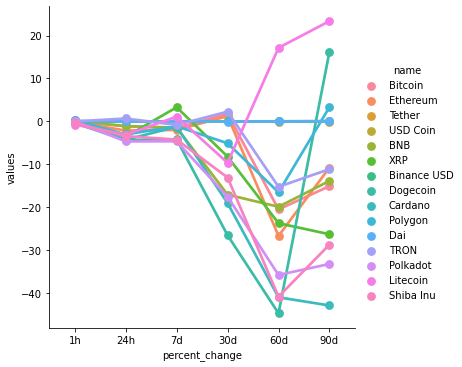

In [18]:
import matplotlib.pyplot as plt
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [19]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9914,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19245775.00000,19245775.00000,nan,1,nan,nan,None,2022-12-28T22:33:00.000Z,16508.02877,16791724933.67381,4.66660,-0.21770,-1.19387,-1.61693,1.76500,-20.54998,-15.18659,317709807496.16150,40.05290,346668604273.89001,None,2022-12-28T22:33:00.000Z,nan,NaN,NaN,NaN,NaN,2022-12-28 22:34:45.632167
1,1027,Ethereum,ETH,ethereum,6322,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",nan,122373866.21780,122373866.21780,nan,2,nan,nan,None,2022-12-28T22:33:00.000Z,1186.09310,4911269025.65175,15.91100,-0.33051,-2.19022,-2.05799,1.18492,-26.74400,-10.98275,145146797872.94870,18.29730,145146797872.95001,None,2022-12-28T22:33:00.000Z,nan,NaN,NaN,NaN,NaN,2022-12-28 22:34:45.632167
2,825,Tether,USDT,tether,45608,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",nan,66247646984.64118,73141766321.23428,nan,3,nan,nan,None,2022-12-28T22:33:00.000Z,0.99966,20925529596.76906,10.97010,-0.00815,-0.02357,-0.03954,-0.00029,-0.05773,-0.04065,66224897706.51716,8.34840,73116649619.58000,None,2022-12-28T22:33:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-12-28 22:34:45.632167
3,3408,USD Coin,USDC,usd-coin,9301,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",nan,44383954984.94630,44383954984.94630,nan,4,nan,nan,None,2022-12-28T22:33:00.000Z,1.00003,2215903938.96405,28.38730,-0.00090,-0.00835,0.00761,-0.02005,0.00442,0.00912,44385091525.13439,5.59520,44385091525.13000,None,2022-12-28T22:33:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-12-28 22:34:45.632167
4,1839,BNB,BNB,bnb,1162,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,159965245.54279,159979963.59043,nan,5,nan,nan,None,2022-12-28T22:33:00.000Z,242.97229,413304161.20415,5.52800,0.01967,-1.18053,-1.48661,-17.13758,-20.01309,-14.03897,38867121730.28680,4.89960,48594457625.35000,None,2022-12-28T22:33:00.000Z,nan,NaN,NaN,NaN,NaN,2022-12-28 22:34:45.632167
5,52,XRP,XRP,xrp,870,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50343500506.00000,99989184828.00000,nan,6,nan,nan,None,2022-12-28T22:33:00.000Z,0.35779,847380799.23952,-8.08160,-0.04310,-3.67826,3.28196,-8.23895,-23.80169,-26.81560,18012223577.36041,2.27060,35778647484.42000,None,2022-12-28T22:33:00.000Z,nan,NaN,NaN,NaN,NaN,2022-12-28 22:34:45.632167
6,4687,Binance USD,BUSD,binance-usd,5912,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",nan,17025159740.99406,17025159740.99406,nan,7,nan,nan,None,2022-12-28T22:33:00.000Z,1.00000,5069719329.66054,10.30080,-0.02642,-0.02114,-0.00702,-0.02047,0.06408,-0.01484,17025183795.50879,2.14620,17025183795.51000,None,2022-12-28T22:33:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-12-28 22:34:45.632167
7,74,Dogecoin,DOGE,dogecoin,628,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",nan,132670764299.89409,132670764299.89409,nan,8,nan,nan,None,2022-12-28T22:33:00.000Z,0.07009,490603382.47852,64.18690,-0.72116,-4.46683,-4.26956,-26.54004,-45.17024,16.02613,9298368426.72071,1.17220,9298368426.72000,None,2022-12-28T22:33:00.000Z,nan,NaN,NaN,NaN,NaN,2022-12-28 

In [20]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,16508.02877,2022-12-28 22:34:45.632167
0,Bitcoin,16512.92836,2022-12-28 22:37:39.070916
0,Bitcoin,16517.65823,2022-12-28 22:38:39.348537
0,Bitcoin,16515.23638,2022-12-28 22:39:39.763028
0,Bitcoin,16516.76407,2022-12-28 22:40:40.132875
0,Bitcoin,16514.29693,2022-12-28 22:41:40.348478
0,Bitcoin,16514.91011,2022-12-28 22:42:40.577626


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

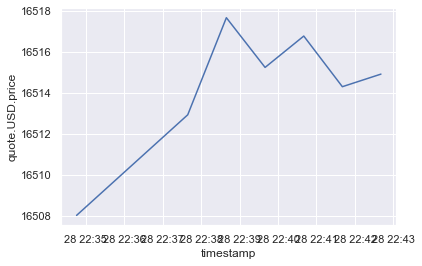

In [21]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)